In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import os

plt.style.use('ggplot')

In [2]:
path='D:\python data'

In [3]:
kaggle.api.dataset_download_files('hmavrodiev/london-bike-sharing-dataset',path=path,unzip=True)

In [4]:
df=pd.read_csv(os.path.join(path,'london_merged.csv'))

In [5]:
df=df.set_index('timestamp')

In [6]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [7]:
def df_to_Xy(df,lag=24):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-lag):
        row=[r for r in df_as_np[i:i+lag]]
        label=df_as_np[i+lag,df.columns.get_loc('cnt')]
        X.append(row)
        y.append(label)

    return np.array(X),np.array(y)

In [8]:
X,y=df_to_Xy(df)

In [9]:
X

array([[[ 1.820e+02,  3.000e+00,  2.000e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        [ 1.380e+02,  3.000e+00,  2.500e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        [ 1.340e+02,  2.500e+00,  2.500e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        ...,
        [ 2.210e+02,  3.000e+00,  2.500e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        [ 1.780e+02,  3.000e+00,  2.000e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        [ 1.570e+02,  4.000e+00,  3.500e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00]],

       [[ 1.380e+02,  3.000e+00,  2.500e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        [ 1.340e+02,  2.500e+00,  2.500e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        [ 7.200e+01,  2.000e+00,  2.000e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        ...,
        [ 1.780e+02,  3.000e+00,  2.000e+00, ...,  0.000e+00,
          1.000e+00,  3.000e+00],
        [ 1.

In [10]:
y

array([ 83.,  67.,  32., ..., 337., 224., 139.])

In [11]:
print(X.shape,y.shape)

(17390, 24, 9) (17390,)


In [12]:
train_index=int(len(X)*0.8)
val_index=int(len(X)*0.9)

X_train,y_train=X[:train_index],y[:train_index]
X_val,y_val=X[train_index:val_index],y[train_index:val_index]
X_test,y_test=X[val_index:],y[val_index:]

# Building LSTM Model

In [13]:
from keras.models import Sequential
from keras.layers import InputLayer,LSTM,Dense
from keras.callbacks import Callback
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

import tensorflow as tf

In [14]:
model=Sequential()

model.add(InputLayer(input_shape=(24,9)))
model.add(LSTM(units=128))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70656     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 87297 (341.00 KB)
Trainable params: 87297 (341.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='MeanSquaredError',metrics=['mae'])

In [16]:
hist=model.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/50


218/218 [==============================] - 9s 28ms/step - loss: 1889724.1250 - mae: 924.8447 - val_loss: 1795915.6250 - val_mae: 848.5873
Epoch 2/50
218/218 [==============================] - 6s 27ms/step - loss: 641205.5625 - mae: 447.4031 - val_loss: 667294.6250 - val_mae: 458.7468
Epoch 3/50
218/218 [==============================] - 6s 26ms/step - loss: 276273.8438 - mae: 298.6320 - val_loss: 387307.9688 - val_mae: 371.8157
Epoch 4/50
218/218 [==============================] - 6s 27ms/step - loss: 194508.9688 - mae: 262.2115 - val_loss: 317456.1250 - val_mae: 334.8549
Epoch 5/50
218/218 [==============================] - 7s 34ms/step - loss: 180598.9688 - mae: 255.3467 - val_loss: 271568.0938 - val_mae: 308.8843
Epoch 6/50
218/218 [==============================] - 7s 33ms/step - loss: 171705.3594 - mae: 248.7532 - val_loss: 290714.3125 - val_mae: 320.4335
Epoch 7/50
218/218 [==============================] - 8s 35ms/step - loss: 156526.0781 - mae: 240.5870 - val_loss:

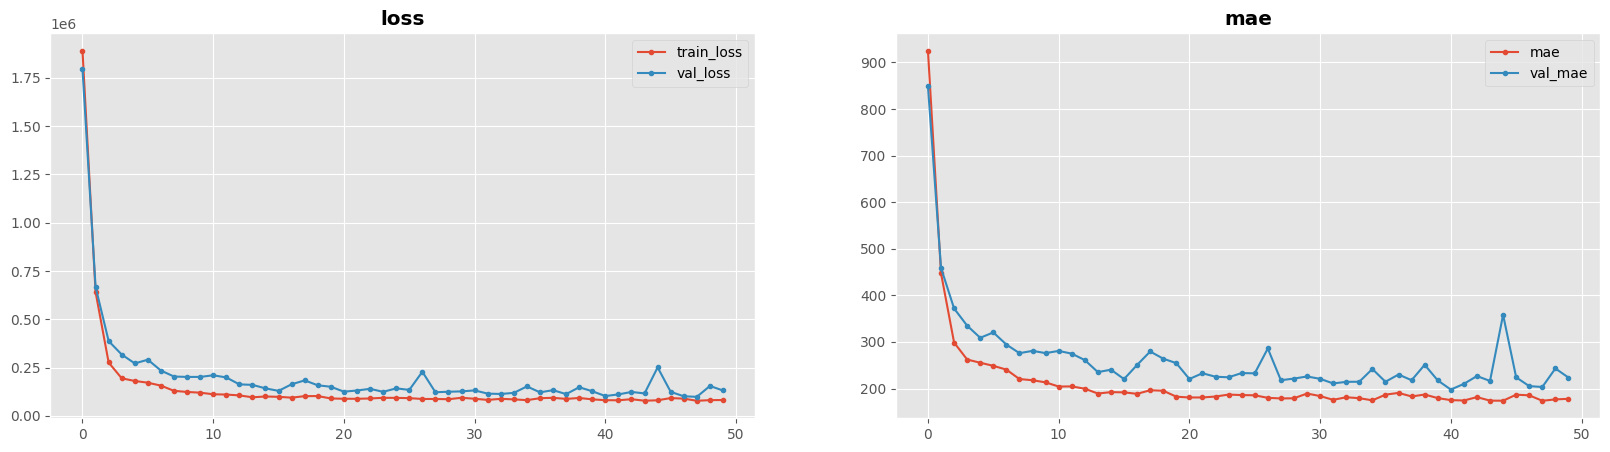

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))

ax1.plot(hist.history['loss'],label='train_loss',marker='.')
ax1.plot(hist.history['val_loss'],label='val_loss',marker='.')
ax1.set_title('loss',fontweight='bold')
ax1.legend()

ax2.plot(hist.history['mae'],label='mae',marker='.')
ax2.plot(hist.history['val_mae'],label='val_mae',marker='.')
ax2.set_title('mae',fontweight='bold')
ax2.legend()

plt.show()

In [18]:
model.save(os.path.join(path,'lstm_model.h5'))

c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from keras.models import load_model
loaded_model=load_model(os.path.join(path,'lstm_model.h5'))

55/55 [==============================] - 1s 6ms/step


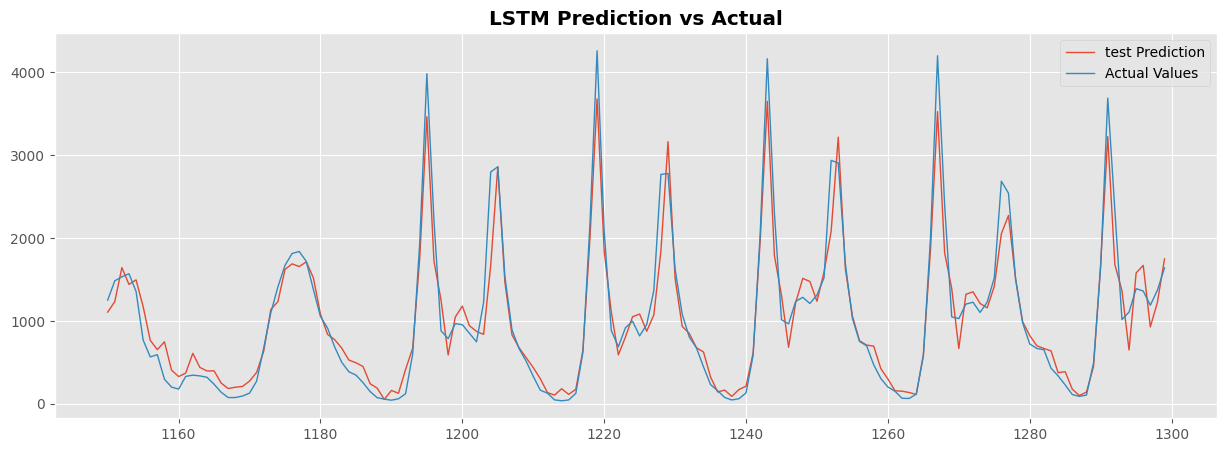

In [20]:
test_prediction=model.predict(X_test).flatten()
test_results=pd.DataFrame(data={'test Prediction':test_prediction,'Actual Values':y_test.flatten()})

test_results.iloc[1150:1300].plot(lw=1,figsize=(15,5))
plt.title('LSTM Prediction vs Actual',fontweight='bold')
plt.show()

In [22]:
from sklearn import metrics
metrics.r2_score(y_test,test_prediction)

0.9167499788962359

# GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
def create_model(lstm_units,dense_units,lr):
    model=Sequential()
    model.add(InputLayer(input_shape=(24,9)))
    model.add(LSTM(lstm_units))
    model.add(Dense(dense_units,activation='relu'))
    model.add(Dense(1,activation='linear'))

    model.compile(optimizer=Adam(learning_rate=lr), loss='MeanSquaredError', metrics=['accuracy'])

    return model

In [20]:
param_grid = {
    'model__lstm_units': [32, 64, 128],
    'model__dense_units': [16, 32, 64],
    'batch_size':[32,64,128],
    'model__lr':[0.1,0.01,0.001]   
}

In [21]:
from scikeras.wrappers import KerasRegressor

In [22]:
model=KerasRegressor(build_fn=create_model,epochs=10,verbose=1)

In [23]:
grid_search_cv=GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  n_jobs=1,
                  cv=3,
                  scoring='neg_mean_absolute_error')

In [24]:

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10


290/290 [==============================] - 5s 9ms/step - loss: 1260247.0000 - accuracy: 0.0000e+00
Epoch 2/10
290/290 [==============================] - 3s 10ms/step - loss: 1171758.1250 - accuracy: 0.0000e+00
Epoch 3/10
290/290 [==============================] - 3s 10ms/step - loss: 1168936.0000 - accuracy: 0.0000e+00
Epoch 4/10
290/290 [==============================] - 3s 10ms/step - loss: 1168673.0000 - accuracy: 0.0000e+00
Epoch 5/10
290/290 [==============================] - 3s 12ms/step - loss: 1171006.6250 - accuracy: 0.0000e+00
Epoch 6/10
290/290 [==============================] - 3s 10ms/step - loss: 1168089.6250 - accuracy: 0.0000e+00
Epoch 7/10
290/290 [==============================] - 3s 10ms/step - loss: 1168574.6250 - accuracy: 0.0000e+00
Epoch 8/10
290/290 [==============================] - 3s 11ms/step - loss: 1168272.0000 - accuracy: 0.0000e+00
Epoch 9/10
290/290 [==============================] - 3s 10ms/step - loss: 1172430.3750 - accuracy: 0.0000e+00


c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
277/290 [===========================>..] - ETA: 0s - loss: 1263868.7500 - accuracy: 0.0000e+00

In [48]:
grid_search_cv.best_params_

{'batch_size': 64, 'dense_units': 128, 'lstm_units': 128}